# Analisi segnali audio (wav)

Importiamo 
- la funzione `read` dalla libreria  `scipy.io.wavfile` per leggere il file `wav` salvarlo in un array

- la funzione `fft`(Fast Fourier Transform) dalla libreria `scipy.fft` per effettuare la trasformata Fourier sul nostro file audio

- importiamo `numpy` con l'alias `np` per operazioni matematiche e gestione dati

- importiamo `matplotlib.pyplot` con l'alias `plt` per poter eseguire plot di dati. `plt.rcParams['figure.figsize'] = [10, 5]` serve a impostare la dimensione dei plot (in pollici)

- importiamo `ipywidgets`con l'alias `widgets` per inserire elementi interattivi

In [19]:
from scipy.io.wavfile import read
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
import ipywidgets as widgets


Salviamo l'ubicazione dei nostri file audio nella lista `files` e poi leggiamo il contenuto e lo salviamo in `sounds`. `sounds[i][k]` sarà una lista di liste con :
-  `i`  : indice del file audio
- `k=0` : sample rate 
- `k=1`: dati audio

Salviamo i dati audio di ogni file nella lista `signals`

In [42]:
files=['sounds/Sound1.wav', 'sounds/Sound2.wav', 'sounds/Sound3.wav', 'sounds/Sound4.wav', 'sounds/Sound1234.wav']
sounds = [read(f) for f in files]


signals = [sound[1][:, 1] for sound in sounds]
print("Ogni file contiene {} dati ad un sample rate di {} Hz e quindi di una durata di circa {:.2f} secondi"
        .format(
            len(signals[0]),
            sounds[0][0],
            len(signals[0])/sounds[0][0]
            )
        )

Ogni file contiene 90833 dati ad un sample rate di 48000 Hz e quindi di una durata di circa 1.89 secondi


C:\Users\fulviof\AppData\Local\Temp\ipykernel_16796\2700166608.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sounds = [read(f) for f in files]


Priviamo a visualizzare una parte del segnale. 
I segnali da 0 a 3 sono note pure, il segnale 4 è la somma di tutti i segnali (un accordo)

Il decoratore `@interact` permette di rendere il grafico interattivo (scelta del segnale e dell'intervallo da visualizzare)

In [48]:
from ipywidgets import interact


@interact(signal=(0,4),sample_start=20000, sample_end=22000)
def plot_signal(signal=0, sample_start=20000, sample_end=22000):
    plt.plot(signals[signal][sample_start:sample_end])


interactive(children=(IntSlider(value=0, description='signal', max=4), IntSlider(value=20000, description='sam…

Versione statica dei segnali

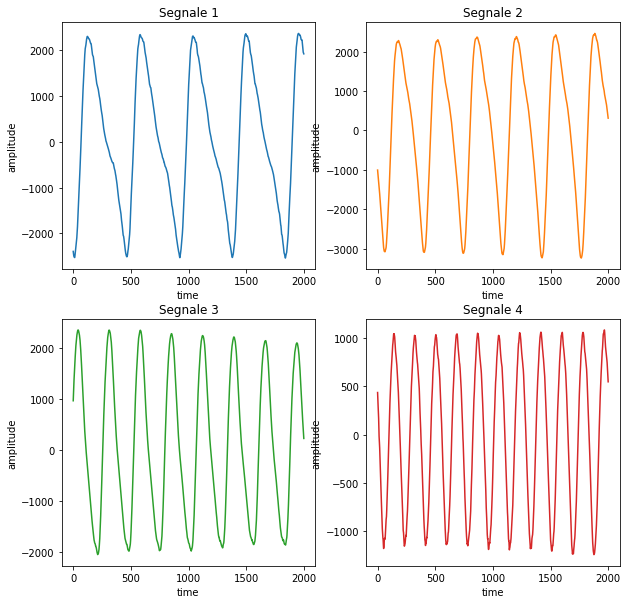

In [8]:

fig, axs = plt.subplots(2, 2,figsize=(10, 10))
axs[0, 0].plot(signals[0][20000:22000])
axs[0, 0].set_title('Segnale 1')
axs[0, 1].plot(signals[1][20000:22000], 'tab:orange')
axs[0, 1].set_title('Segnale 2')
axs[1, 0].plot(signals[2][20000:22000], 'tab:green')
axs[1, 0].set_title('Segnale 3')
axs[1, 1].plot(signals[3][20000:22000], 'tab:red')
axs[1, 1].set_title('Segnale 4')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='amplitude')
    


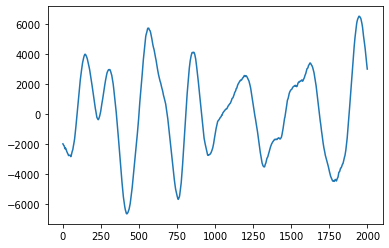

In [9]:
plt.plot(signals[4][20000:22000])


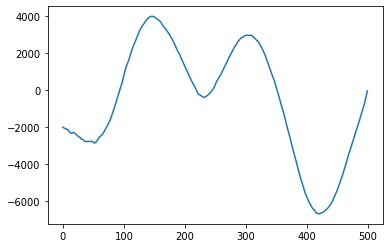

In [10]:
plt.plot(signals[4][20000:20500])

Effettuiamo la trasformata di Fourier sui segnali.

In [52]:
signals_fft = [fft(signal) for signal in signals]
signals_fft[0]


array([ -12123.            -0.j        ,   -3079.54028984 -6320.5733744j ,
       -192863.03575254-10711.73198624j, ...,
        115642.93240469 +6658.82164472j, -192863.03575254+10711.73198624j,
         -3079.54028984 +6320.5733744j ])

Plot delle intensità dei puri segnali per le diverse frequenze

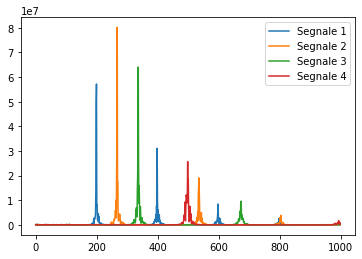

In [35]:
fig, ax = plt.subplots()
fft_0, = ax.plot(abs(signals_fft[0][1:1000]),label='Segnale 1')
fft_1, = ax.plot(abs(signals_fft[1][1:1000]),label='Segnale 2')
fft_2, = ax.plot(abs(signals_fft[2][1:1000]),label='Segnale 3')
fft_3, = ax.plot(abs(signals_fft[3][1:1000]),label='Segnale 4')
ax.legend(handles=[fft_0, fft_1,fft_2,fft_3])


Plot delle intensità del segnale finale per le diverse frequenze

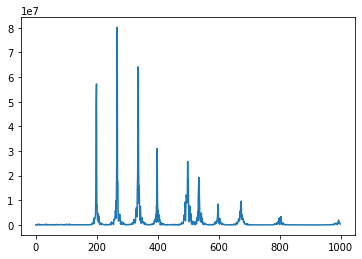

In [33]:

plt.plot(abs(signals_fft[4][1:1000]))

Se applichiamo la trasformata di Fourier sull'array delle frequenze torniamo ad aver il segnale originale 

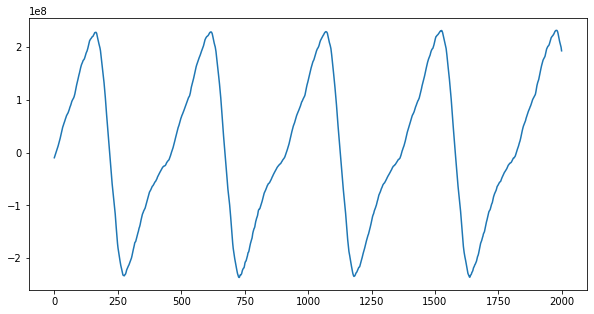

In [56]:
inv= fft(signals_fft[0])
plt.plot(inv[20000:22000])

# DFT
Proviamo a implementare in maniera non ottimizzata l'algoritmo della trasformata (discreta) di Fourier 

La definizione è :

$$X_f=\sum_{n=0}^{N-1} x_n \cdot e^{\frac{-2\pi i}{N}\cdot n f}$$

In [60]:
def dft(signal):
	N = len(signal)
	# Precompute all the roots of unity we'll need.
	# Zeta here refers to exp(-2π * im / N).
	zeta_powers = [ np.exp(-2*np.pi * 1j * n / N) for n in range(0,N)]


	return [
     	sum(signal[n] * zeta_powers[(n * f) % N]
			for n in range(0,N)
		)
		for f in range(0,N)
	]

Notiamo la velocità di esecuzione (riduciamo a i primi 1000 elementi per evitare di bloccare tutto)

In [65]:
slow_dft=dft(signals[0][0:1000])
slow_dft[0:10]

[(-466+0j),
 (-436.14111805021827-162.34826938653828j),
 (-351.3974677282492-301.9369287524478j),
 (-225.3177556388333-400.1012495684959j),
 (-77.52635932090408-445.50787437741326j),
 (70.0247499527377-435.87306758680705j),
 (197.09861070957749-377.8508356413643j),
 (288.65743865757526-285.1908868310419j),
 (337.09317748634567-175.64239278226364j),
 (342.82050203910006-67.33107592478454j)]

In [74]:
fast_dft=fft(signals[0][0:1000])
fast_dft[0:10]

array([-466.          -0.j        , -436.14111805-162.34826939j,
       -351.39746773-301.93692875j, -225.31775564-400.10124957j,
        -77.52635932-445.50787438j,   70.02474995-435.87306759j,
        197.09861071-377.85083564j,  288.65743866-285.19088683j,
        337.09317749-175.64239278j,  342.82050204 -67.33107592j])

Controlliamo se i risultati sono uguali (introduciamo un margine di tolleranza per tenere conto delle varie approssimazioni, ricordiamoci che stiamo utilizzando algoritmi numerici!!)

In [71]:
np.isclose(slow_dft,fast_dft)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,